In [2]:
import cv2
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
# Read the input image
img = cv2.imread('imgeler/KA.AN1.39.TIFF')
  
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### The Functions are def 

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
  
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

In [ ]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), 
                  (0, 0, 255), 2)
      
    faces = img[(y+2):(y-2) + (h-2), (x+2):(x-2) + (w-2)]
    cv2.imwrite('face2.jpg', faces)
  
# cv2.imshow('img', img)
cv2.waitKey()

In [5]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [14]:
EMO=str("surprised")
images=load_images_from_folder(f"/Users/MUHAMMETTARIKERKAM/Desktop/Bitirme Projesi/datasetler/resimler/faceDetectedImages1/faceDetectedImages_CK++/{EMO}")
a=0
for img in images:
    a=a+1
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), 
                  (0, 0, 255), 2)
      
        faces = img[(y+2):(y-2) + (h-2), (x+2):(x-2) + (w-2)]
        faces= cv2.cvtColor(faces, cv2.COLOR_BGR2GRAY)
        faces=  cv2.equalizeHist(faces)
        faces=cv2.resize(faces, (240, 240))
        #LBP algorithm
        for i in range(0, 240):
            for j in range(0, 240):
                faces[i, j] = lbp_calculated_pixel(faces, i, j)
         
        #faces=Hog_Feature_Extractor(faces)
        cv2.imwrite(f'/Users/MUHAMMETTARIKERKAM/Desktop/Bitirme Projesi/datasetler/resimler/LBP_FULL/{EMO}/{EMO}{a}.jpg', faces)
    

In [ ]:
#Display image using matplotlib (Works)
b= cv2.split(gray)
frame_rgb = cv2.merge(b)
plt.imshow(frame_rgb,cmap='gray')

In [ ]:
cv2.imshow("face",faces)
cv2.imwrite('face.jpg', faces)
cv2.waitKey()

In [12]:
def Hog_Feature_Extractor(image):

    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, multichannel=False)
    # save the images
    return hog_image

In [ ]:
hist=hist*255
cv2.imwrite('color_img.jpg', hist)
cv2.imshow("image", hist)
cv2.waitKey()

In [7]:
gray.shape

(256, 256)

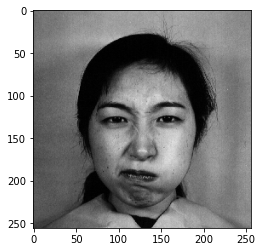

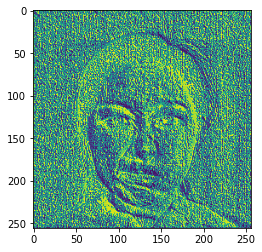

LBP Program is finished


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

	
def get_pixel(img, center, x, y):
	
	new_value = 0
	
	try:
		# If local neighbourhood pixel
		# value is greater than or equal
		# to center pixel values then
		# set it to 1
		if img[x][y] >= center:
			new_value = 1
			
	except:
		# Exception is required when
		# neighbourhood value of a center
		# pixel value is null i.e. values
		# present at boundaries.
		pass
	
	return new_value

# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):

	center = img[x][y]

	val_ar = []
	
	# top_left
	val_ar.append(get_pixel(img, center, x-1, y-1))
	
	# top
	val_ar.append(get_pixel(img, center, x-1, y))
	
	# top_right
	val_ar.append(get_pixel(img, center, x-1, y + 1))
	
	# right
	val_ar.append(get_pixel(img, center, x, y + 1))
	
	# bottom_right
	val_ar.append(get_pixel(img, center, x + 1, y + 1))
	
	# bottom
	val_ar.append(get_pixel(img, center, x + 1, y))
	
	# bottom_left
	val_ar.append(get_pixel(img, center, x + 1, y-1))
	
	# left
	val_ar.append(get_pixel(img, center, x, y-1))
	
	# Now, we need to convert binary
	# values to decimal
	power_val = [1, 2, 4, 8, 16, 32, 64, 128]

	val = 0
	
	for i in range(len(val_ar)):
		val += val_ar[i] * power_val[i]
		
	return val

path = 'imgeler/KA.AN1.39.TIFF'
img_bgr = cv2.imread(path)

height, width, _ = img_bgr.shape

# We need to convert RGB image
# into gray one because gray
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
						cv2.COLOR_BGR2GRAY)

# Create a numpy array as
# the same height and width
# of RGB image
img_lbp = np.zeros((height, width),
				np.uint8)

for i in range(0, height):
	for j in range(0, width):
		img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

plt.imshow(img_bgr)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

print("LBP Program is finished")
